In [24]:
import kagglehub
ninadaithal_imagesoasis_path = kagglehub.dataset_download('ninadaithal/imagesoasis')

print('Data source import complete.')


Using Colab cache for faster access to the 'imagesoasis' dataset.
Data source import complete.


In [1]:
import numpy as np
import pandas as pd
import os

In [2]:
import keras
import seaborn as sns
import matplotlib.pyplot as plt
from keras.models import Sequential
import PIL
import os
import cv2
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from PIL import Image
from keras.layers import Conv2D,Flatten,Dense,Dropout,BatchNormalization,MaxPooling2D
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import EarlyStopping,ModelCheckpoint
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from tqdm import tqdm
from imblearn.over_sampling import SMOTE


In [25]:
non_demented = []
very_mild_demented = []
mild_demented = []
moderate_demented = []

# Download per category
for dirname, _, filenames in os.walk('/kaggle/input/imagesoasis/Data/Non Demented'):
    for filename in filenames:
        non_demented.append(os.path.join(dirname, filename))

for dirname, _, filenames in os.walk('/kaggle/input/imagesoasis/Data/Very mild Dementia'):
    for filename in filenames:
        very_mild_demented.append(os.path.join(dirname, filename))

for dirname, _, filenames in os.walk('/kaggle/input/imagesoasis/Data/Mild Dementia'):
    for filename in filenames:
        mild_demented.append(os.path.join(dirname, filename))

for dirname, _, filenames in os.walk('/kaggle/input/imagesoasis/Data/Moderate Dementia'):
    for filename in filenames:
        moderate_demented.append(os.path.join(dirname, filename))


In [26]:
images = []
labels = []
for subfolder in tqdm(os.listdir('/kaggle/input/imagesoasis')):
    subfolder_path = os.path.join('/kaggle/input/imagesoasis', subfolder)
    for folder in os.listdir(subfolder_path):
        subfolder_path2=os.path.join(subfolder_path,folder)
        for image_filename in os.listdir(subfolder_path2):
            image_path = os.path.join(subfolder_path2, image_filename)
            images.append(image_path)
            labels.append(folder)
df = pd.DataFrame({'image': images, 'label': labels})
df

100%|██████████| 1/1 [00:00<00:00,  9.89it/s]


,image,label
0,/kaggle/input/imagesoasis/Data/Non Demented/OA...,Non Demented
1,/kaggle/input/imagesoasis/Data/Non Demented/OA...,Non Demented
2,/kaggle/input/imagesoasis/Data/Non Demented/OA...,Non Demented
3,/kaggle/input/imagesoasis/Data/Non Demented/OA...,Non Demented
4,/kaggle/input/imagesoasis/Data/Non Demented/OA...,Non Demented
...,...,...
86432,/kaggle/input/imagesoasis/Data/Mild Dementia/O...,Mild Dementia
86433,/kaggle/input/imagesoasis/Data/Mild Dementia/O...,Mild Dementia
86434,/kaggle/input/imagesoasis/Data/Mild Dementia/O...,Mild Dementia
86435,/kaggle/input/imagesoasis/Data/Mild Dementia/O...,Mild Dementia


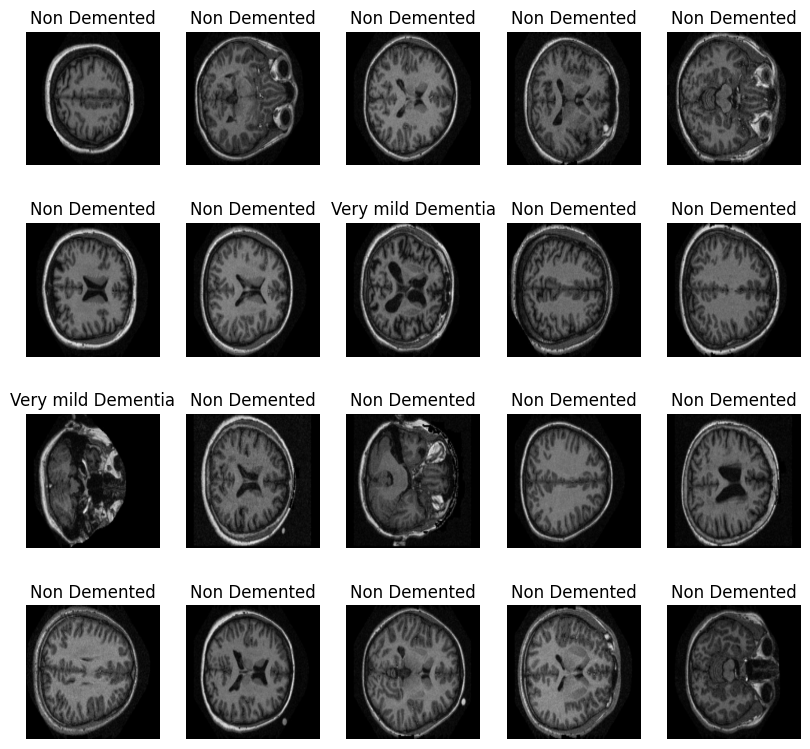

In [28]:
plt.figure(figsize=(10,12))
for n,i in enumerate(np.random.randint(0,len(df),20)):
    plt.subplot(5,5,n+1)
    img=cv2.imread(df.image[i])
    img=cv2.resize(img,(224,224))
    img=cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    plt.imshow(img)
    plt.axis('off')
    plt.title(df.label[i],fontsize=12)

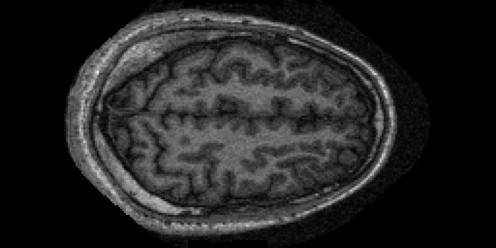

In [29]:
PIL.Image.open(str(non_demented[0]))

In [30]:
print(len(non_demented))
print(len(mild_demented))
print(len(moderate_demented))
print(len(very_mild_demented))

67222
5002
488
13725


In [32]:
encoder= OneHotEncoder()
encoder.fit([[0],[1],[2],[3]])

OneHotEncoder()

In [33]:
data = []
result = []
for s in non_demented:
    img = Image.open(s)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[0]]).toarray())

for s in mild_demented:
    img = Image.open(s)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[1]]).toarray())

for s in moderate_demented:
    img = Image.open(s)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[2]]).toarray())

for s in very_mild_demented:
    img = Image.open(s)
    img = img.resize((128,128))
    img = np.array(img)
    if(img.shape == (128,128,3)):
        data.append(np.array(img))
        result.append(encoder.transform([[3]]).toarray())


In [34]:
X=np.array(data)


In [35]:
X.shape

(86437, 128, 128, 3)

In [36]:
y=np.array(result)
y=y.reshape(X.shape[0],4)
y=np.argmax(y, axis=1)
y

array([0, 0, 0, ..., 3, 3, 3])

In [38]:
X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.2,random_state=42, shuffle = True)

In [39]:
X_train.shape

(69149, 128, 128, 3)

In [40]:
X_test.shape

(17288, 128, 128, 3)

In [41]:
model=Sequential()


In [42]:
model.add(Conv2D(filters=32,kernel_size=2,padding='Same',input_shape = (128,128,3)))

/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [43]:
model.add(Conv2D(filters=32,kernel_size=2,padding='Same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=64,kernel_size=2,padding='Same',activation='relu'))
model.add(Conv2D(filters=64,kernel_size=2,padding='Same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))
model.add(Conv2D(filters=128,kernel_size=2,padding='Same',activation='relu'))
model.add(Conv2D(filters=128,kernel_size=2,padding='Same',activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=(2,2)))
model.add(Dropout(0.25))


model.add(Flatten())
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(4,activation='softmax'))

In [44]:
print(model.summary())

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 128, 128, 32)   │           416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 128, 128, 32)   │         4,128 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 128, 128, 32)   │           128 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64, 64, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 64, 64, 64)     │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 64, 64, 64)     │        16,448 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 64, 64, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 32, 32, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_4 (Conv2D)               │ (None, 32, 32, 128)    │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 32, 32, 128)    │        65,664 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 32, 32, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 16, 16, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 32768)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     8,388,864 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 4)              │         1,028 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 8,518,596 (32.50 MB)

 Trainable params: 8,518,148 (32.49 MB)

 Non-trainable params: 448 (1.75 KB)

None


In [45]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [46]:
from keras.callbacks import EarlyStopping
early_stopping=EarlyStopping(
    monitor="val_loss",
    min_delta=0.00001,
    patience=20,
    verbose=0,
    mode="auto",
    baseline=None,
    restore_best_weights=True,
    start_from_epoch=0,
)

In [47]:
history= model.fit(X_train,y_train, validation_split=0.2,epochs=16,callbacks=[early_stopping],batch_size=128)

Epoch 1/16
433/433 ━━━━━━━━━━━━━━━━━━━━ 40s 55ms/step - accuracy: 0.7553 - loss: 2.4434 - val_accuracy: 0.8657 - val_loss: 0.3254
Epoch 2/16
433/433 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.8967 - loss: 0.2519 - val_accuracy: 0.8938 - val_loss: 0.2316
Epoch 3/16
433/433 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.9530 - loss: 0.1207 - val_accuracy: 0.9824 - val_loss: 0.0559
Epoch 4/16
433/433 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.9709 - loss: 0.0785 - val_accuracy: 0.9909 - val_loss: 0.0307
Epoch 5/16
433/433 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.9800 - loss: 0.0549 - val_accuracy: 0.9772 - val_loss: 0.0814
Epoch 6/16
433/433 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.9827 - loss: 0.0493 - val_accuracy: 0.9962 - val_loss: 0.0114
Epoch 7/16
433/433 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.9830 - loss: 0.0472 - val_accuracy: 0.9985 - val_loss: 0.0068
Epoch 8/16
433/433 ━━━━━━━━━━━━━━━━━━━━ 11s 26ms/step - accuracy: 0.9852 - loss: 0.0415 - 

In [48]:
model.evaluate(X_test,y_test)

541/541 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9993 - loss: 0.0023


[0.0021540499292314053, 0.9993637204170227]

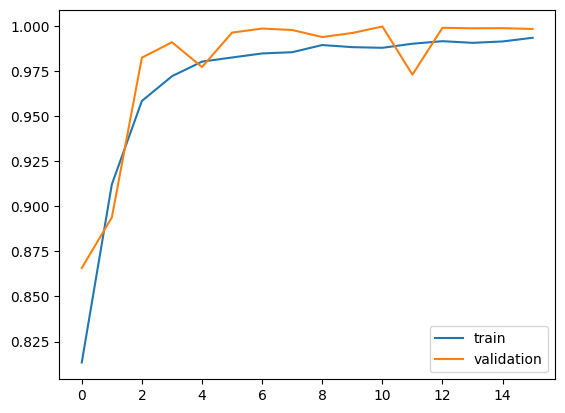

In [49]:
%matplotlib inline
plt.plot(history.history['accuracy'],label='train')
plt.plot(history.history['val_accuracy'],label='validation')
plt.legend()
plt.show()

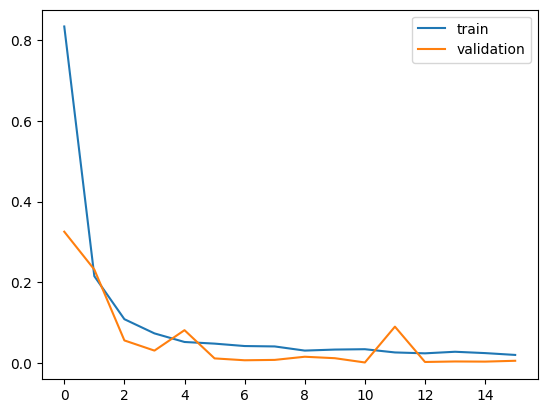

In [50]:
plt.plot(history.history['loss'],label='train')
plt.plot(history.history['val_loss'],label='validation')
plt.legend()
plt.show()

In [51]:
#classes names
class_name = {0: "Mild Dementia",1: "Moderate Dementia" , 2: "Non Demented", 3: "Very mild Dementia"}

In [52]:
test_scores = model.evaluate(X_test,y_test)
test_scores


541/541 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.9993 - loss: 0.0023


[0.0021540499292314053, 0.9993637204170227]

In [53]:
predicted_test_labels = model.predict(X_test)
res = model.predict(X_test)
predicted_test_labels =  np.argmax(predicted_test_labels,axis= 1 )
predicted_test_labels[1]

541/541 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step
541/541 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


np.int64(0)

In [54]:
ypred = []
for i in res:
  temp = np.argmax(i)
  ypred.append(temp)
ypred = np.array(ypred)

In [55]:
from sklearn.metrics import confusion_matrix,ConfusionMatrixDisplay
from sklearn.metrics import accuracy_score

accuracy_score(y_test,ypred)


0.9993637204997686

<Figure size 640x480 with 0 Axes>

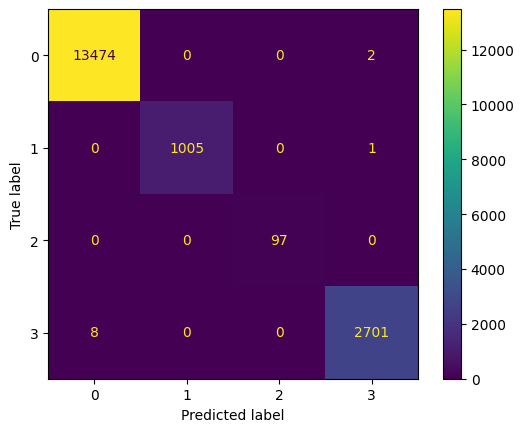

In [56]:
cf = confusion_matrix(y_true = y_test ,y_pred =  ypred)
plt.figure(figsize=(8, 6), dpi=80, facecolor='w', edgecolor='k')
x = ConfusionMatrixDisplay(cf)
x.plot()

In [57]:
print(classification_report(y_true = y_test ,y_pred =  ypred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     13476
           1       1.00      1.00      1.00      1006
           2       1.00      1.00      1.00        97
           3       1.00      1.00      1.00      2709

    accuracy                           1.00     17288
   macro avg       1.00      1.00      1.00     17288
weighted avg       1.00      1.00      1.00     17288



In [71]:
model.save("best_alzheimer_model_full.keras")